In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

In [132]:
import ggplot

AttributeError: module 'pandas' has no attribute 'tslib'

In [120]:

def make_plots_each_algorithm(df_path):
    
    
    df = pd.read_csv(df_path)



    columns = list(df.columns)
    # conf_mat_cols = [col for col in columns if col.split("-")[1] in ['TP','TN','FP','FN']]
    # confusion matrix value we not need for now
    # df = df[(df["Score"] < 1) & (df['Score'] != 0)]

    df = df[df['Metrics'].apply(lambda x: False if x.split("-")[1] in ['TP','TN','FP','FN','FalsePositiveRate','FalseNegativeRate'] else True)]

    df['Score'] = round(df['Score'],2)

    df['Set'] = df['Metrics'].apply(lambda x: x.split("-")[0])


    return df


    algorithms = df['Algorithm'].unique().tolist()
    imbalance_mets = df['Imbalance'].unique().tolist()
    n_imbalance_mets = len(imbalance_mets)

    # print(len(imbalance_mets))

    
    for algorithm in algorithms:



        fig,ax = plt.subplots(5,3)
        fig.set_figheight(15)
        fig.set_figwidth(15)
        fig.suptitle(algorithm)
        fig.subplots_adjust(hspace=.8)
        axes = ax.flatten()
        
        alg_df = df[(df['Algorithm']==algorithm)]
        # return alg_df
        alg_df = alg_df.groupby(["Imbalance","Metrics"],as_index=False)['Score'].max()
        # return alg_df
        
        for i in range(n_imbalance_mets):
          


            imb = imbalance_mets[i]
            alg_met_df = alg_df[alg_df['Imbalance']==imb].copy()

            axes[i].bar(alg_met_df['Metrics'],alg_met_df['Score'])
            axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
            axes[i].set_title(imb)
        
        print()
        break
                    
    


# def make_plots_each_metric()


In [121]:
df = make_plots_each_algorithm("../src/results/first_attempt_result.csv")
df = make_plots_each_algorithm("../src/results/first_attempt_result_4_balancers.csv")

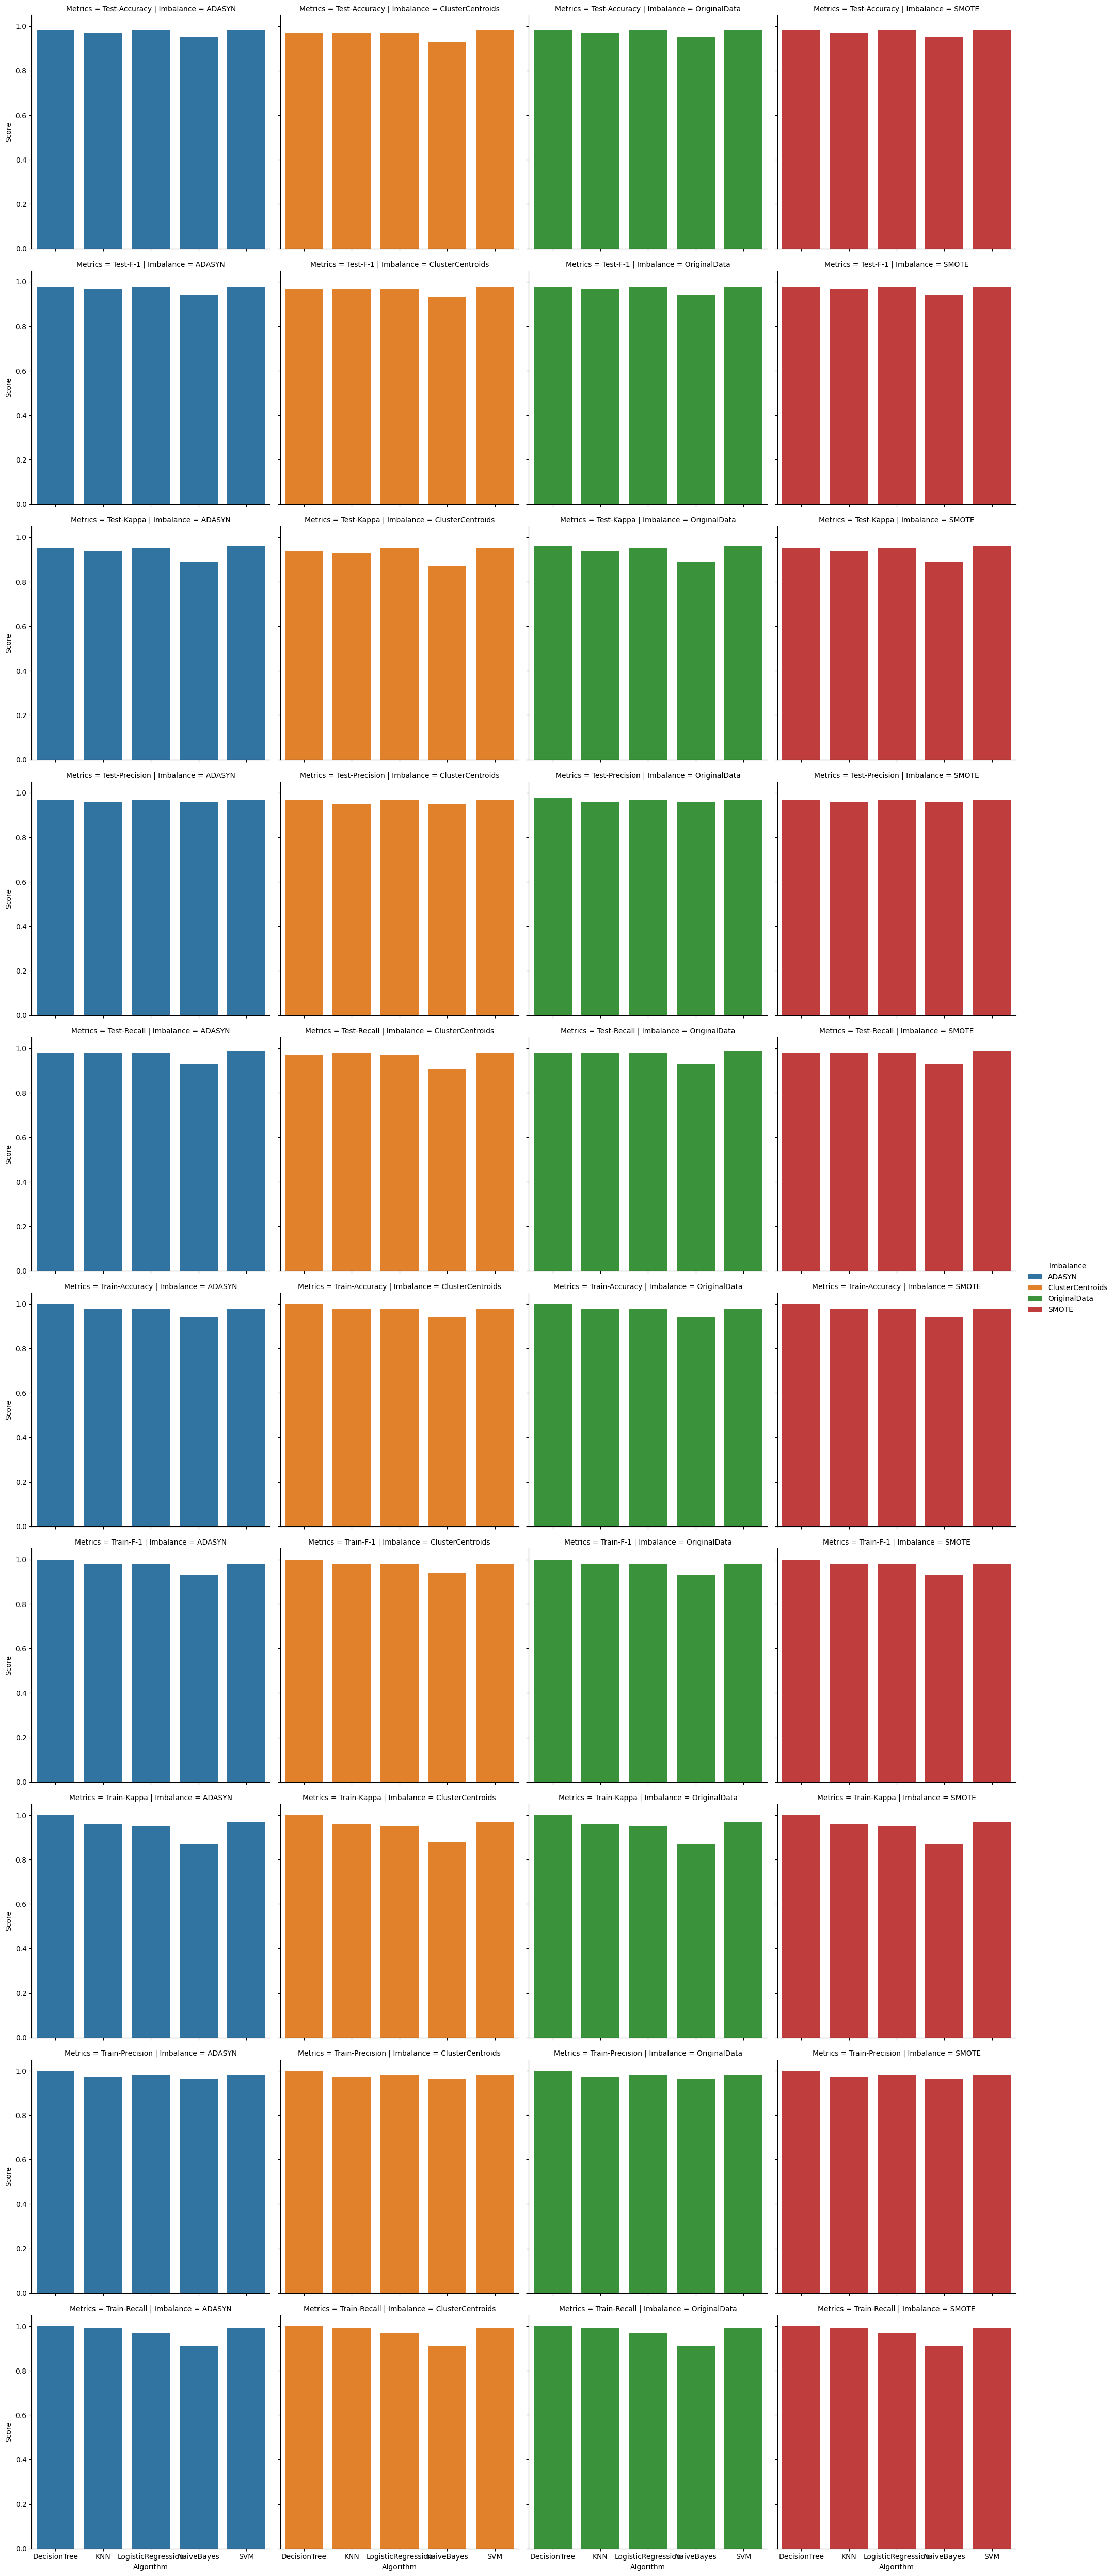

In [130]:
balancers = df['Imbalance'].unique()
metrics = df['Metrics'].unique()

bal_df = df.groupby(['Algorithm','Imbalance','Metrics'],as_index=False)['Score'].max()


g = sns.catplot(bal_df,x='Algorithm',y='Score',row='Metrics',kind='bar',col='Imbalance',hue='Imbalance')


# for ax,ticks in zip(g.axes.flat,bal_df.Algorithm.unique()):
#     ax.set_xticklabels(bal_df.Algorithm.unique(), rotation=45)

In [114]:
df

,Algorithm,ImputerNum,ImputerCat,Imbalance,Metrics,Score,Set
0,LogisticRegression,SimpleImputer_mean,SimpleImputer_mode,SMOTE,Train-F-1,0.98,Train
1,DecisionTree,SimpleImputer_mean,SimpleImputer_mode,SMOTE,Train-F-1,1.00,Train
2,NaiveBayes,SimpleImputer_mean,SimpleImputer_mode,SMOTE,Train-F-1,0.93,Train
3,KNN,SimpleImputer_mean,SimpleImputer_mode,SMOTE,Train-F-1,0.98,Train
4,SVM,SimpleImputer_mean,SimpleImputer_mode,SMOTE,Train-F-1,0.98,Train
...,...,...,...,...,...,...,...
2595,LogisticRegression,KNNImpuer,SimpleImputer_mode,RandomUnderSampler,Test-Precision,0.98,Test
2596,DecisionTree,KNNImpuer,SimpleImputer_mode,RandomUnderSampler,Test-Precision,0.99,Test
2597,NaiveBayes,KNNImpuer,SimpleImputer_mode,RandomUnderSampler,Test-Precision,0.98,Test
2598,KNN,KNNImpuer,SimpleImputer_mode,RandomUnderSampler,Test-Precision,0.96,Test


In [1]:
for bal in df['Imbalance'].unique():

    ddf = df[df['Imbalance'] == bal]
    
    g = sns.catplot(ddf,x='Metrics',y='Score',kind='bar',col='Set',hue='Algorithm',legend=True)
        
    plt.legend(title='Algorithm')
    # Rotate x-axis tick labels for all subplots
    for ax,ticks in zip(g.axes.flat,df.Metrics.unique()):
        ax.set_xticklabels(df.Metrics.unique(), rotation=45)
        ax.set_title(bal)
    # plt.xticks(rotation=45)
    # plt.title(bal)
    plt.show()

NameError: name 'df' is not defined

In [22]:
ax.get_xticklabels()

[Text(0, 0, ''),
 Text(1, 0, ''),
 Text(2, 0, ''),
 Text(3, 0, ''),
 Text(4, 0, ''),
 Text(5, 0, ''),
 Text(6, 0, ''),
 Text(7, 0, ''),
 Text(8, 0, ''),
 Text(9, 0, '')]